# <h1 align="center"><font color="red">Aproveitando os testes `ANOVA` e `Kruskal-Wallis` para analisar o impacto da Grande Recessão nos preços da habitação</font></h1>

<font color="yellow">Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

Link de estudo:

* [Machine Learning Mastery: ANOVA and the Kruskal-Wallis Test](https://machinelearningmastery.com/leveraging-anova-and-kruskal-wallis-tests-to-analyze-the-impact-of-the-great-recession-on-housing-prices/?utm_source=drip&utm_medium=email&utm_campaign=Garage+or+Not%3F+Housing+Insights+Through+the+Chi-Squared+Test+for+Ames%2C+Iowa&utm_content=Garage+or+Not%3F)

# <font color="gree">Contextualizando</font>

<font color="orange">No mundo imobiliário, vários fatores influenciam os preços dos imóveis. A economia, a procura do mercado, a localização e até o ano em que um imóvel é vendido podem desempenhar papéis significativos. Os anos de `2007` a `2009` marcaram uma época tumultuada para o `Mercado imobiliário dos EUA`. Este período, muitas vezes referido como a Grande Recessão, assistiu a um declínio drástico nos valores das casas, a um aumento nas execuções hipotecárias e a uma turbulência generalizada nos mercados financeiros. O impacto da recessão nos preços da habitação foi profundo, com muitos proprietários a encontrarem-se em casas que valiam menos do que as suas hipotecas. O efeito cascata desta recessão foi sentido em todo o país, com algumas áreas a registar quedas mais acentuadas e recuperações mais lentas do que outras.

Dado este cenário, é particularmente intrigante analisar os `Dados habitacionais de Ames`, `Iowa`, uma vez que o conjunto de dados abrange de `2006` a `2010`, encapsulando o auge e as consequências da Grande Recessão. O ano de venda, em meio a tanta volatilidade econômica, influencia o preço de venda em Ames? Neste Notebook, você se aprofundará no conjunto de dados da Ames Housing para explorar essa consulta usando `Análise Exploratória de Dados` (`EDA`) e dois testes estatísticos: `ANOVA` e o Teste `Kruskal-Wallis`.</font>

# <font color="gree">EDA: percepções visuais</font>

Para começar, vamos carregar o [conjunto de dados da Ames Housing](https://raw.githubusercontent.com/Padre-Media/dataset/main/Ames.csv) e comparar diferentes anos de venda com a `variável dependente`: o preço de venda (`the sales price`).

In [1]:
# Importando as nossas Bibliotecas:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Use essa flag caso esteja utilizando o jupyter notebook ou o console ipython
%matplotlib inline

 
# Carregando nosso Dataset:
Ames = pd.read_csv('./Ames.csv')
 
Ames.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GeoRefNo,Prop_Addr,Latitude,Longitude
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,NaN,0,3,2010,WD,Normal,909176150.0,436 HAYWARD AVE,42.018564,-93.651619
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,NaN,0,2,2009,WD,Normal,905476230.0,3416 WEST ST,42.024855,-93.663671
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,NaN,0,11,2007,WD,Normal,911128020.0,320 S 2ND ST,42.021548,-93.614068
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,NaN,0,5,2009,WD,Normal,535377150.0,1524 DOUGLAS AVE,42.037391,-93.612207
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,NaN,0,11,2009,WD,Normal,534177230.0,2304 FILLMORE AVE,42.044554,-93.631818


In [2]:
Ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2579 non-null   int64  
 1   GrLivArea      2579 non-null   int64  
 2   SalePrice      2579 non-null   int64  
 3   MSSubClass     2579 non-null   int64  
 4   MSZoning       2579 non-null   object 
 5   LotFrontage    2117 non-null   float64
 6   LotArea        2579 non-null   int64  
 7   Street         2579 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2579 non-null   object 
 10  LandContour    2579 non-null   object 
 11  Utilities      2579 non-null   object 
 12  LotConfig      2579 non-null   object 
 13  LandSlope      2579 non-null   object 
 14  Neighborhood   2579 non-null   object 
 15  Condition1     2579 non-null   object 
 16  Condition2     2579 non-null   object 
 17  BldgType       2579 non-null   object 
 18  HouseSty

In [3]:
# Tipo de dado é:
type(Ames["YrSold"].iloc[0])

numpy.int64

In [4]:
# Convertendo 'YrSold' em uma variável categórica:
Ames['YrSold'] = Ames['YrSold'].astype('category')
 
Ames.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GeoRefNo,Prop_Addr,Latitude,Longitude
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,NaN,0,3,2010,WD,Normal,909176150.0,436 HAYWARD AVE,42.018564,-93.651619
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,NaN,0,2,2009,WD,Normal,905476230.0,3416 WEST ST,42.024855,-93.663671
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,NaN,0,11,2007,WD,Normal,911128020.0,320 S 2ND ST,42.021548,-93.614068
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,NaN,0,5,2009,WD,Normal,535377150.0,1524 DOUGLAS AVE,42.037391,-93.612207
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,NaN,0,11,2009,WD,Normal,534177230.0,2304 FILLMORE AVE,42.044554,-93.631818


In [7]:
Ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PID            2579 non-null   int64   
 1   GrLivArea      2579 non-null   int64   
 2   SalePrice      2579 non-null   int64   
 3   MSSubClass     2579 non-null   int64   
 4   MSZoning       2579 non-null   object  
 5   LotFrontage    2117 non-null   float64 
 6   LotArea        2579 non-null   int64   
 7   Street         2579 non-null   object  
 8   Alley          168 non-null    object  
 9   LotShape       2579 non-null   object  
 10  LandContour    2579 non-null   object  
 11  Utilities      2579 non-null   object  
 12  LotConfig      2579 non-null   object  
 13  LandSlope      2579 non-null   object  
 14  Neighborhood   2579 non-null   object  
 15  Condition1     2579 non-null   object  
 16  Condition2     2579 non-null   object  
 17  BldgType       2579 non-null   ob

In [8]:
# CUIDADO --> Ver melhor o ".info()", porque aí aparecerá que é CATEGÓRICO:
type(Ames["YrSold"].iloc[0])

numpy.int64

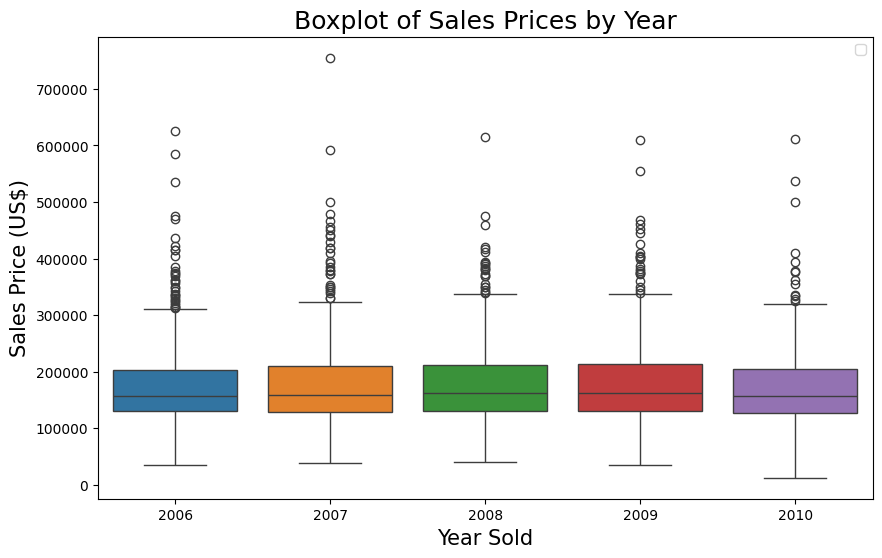

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Ames['YrSold'], y=Ames['SalePrice'], hue=Ames['YrSold'])
plt.title('Boxplot of Sales Prices by Year', fontsize=18)
plt.xlabel('Year Sold', fontsize=15)
plt.ylabel('Sales Price (US$)', fontsize=15)
plt.legend('')
plt.show()
